# Decision Boundaries with Logistic Regression

## What is a Decision Boundary?
While training a classifier on a dataset, using a specific classification algorithm, it is required to define a set of hyper-planes, called Decision Boundary, that separates the data points into specific classes, where the algorithm switches from one class to another. On one side a decision boundary, a datapoints is more likely to be called as class A — on the other side of the boundary, it’s more likely to be called as class B. 

Decision Boundaries are not only confined to just the data points that we have provided, but also they span through the entire feature space we trained on. The model can predict a value for any possible combination of inputs in our feature space. Visualization of decision boundaries can illustrate how sensitive models are to each dataset

To understand the mathematics behind how decision boundaries are perceived. Check out [THIS LINK](https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/)

**Let us import the necessary packages**

In [63]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Reading the dataset
df = pd.read_excel('Decision Boundaries.xlsx' , index_col = None)
df.head()

,A,B,Target
0,0.658,1.570,1
1,0.676,1.185,1
2,-0.084,0.343,0
3,1.019,0.956,1
4,0.853,0.901,1


Here, we have two columns A and B and a target column. Let us assign the two columns to X and y.

In [100]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

To understand the decision boundary, we will first scale our data and proceed to plot it. Note that we are only scaling the variables A and B since the target variable has just 0s and 1s.

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [102]:
# Adjusting the size of the plot
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [103]:
# Importing the logistic regression model
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV()

We will now create a function which helps us plot each point with a decision boundary. 

Decision Boundary can be visualized by dense sampling via meshgrid. However, if the grid resolution is not enough, the boundary will appear inaccurate. The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values.

In [104]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    # ravel - returns a contiguous flattened array.
    # c_ - concatenates slice objects 
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    # contourf - contours a plot with set colors
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

Text(0.5, 1.0, 'Logistic Regression')

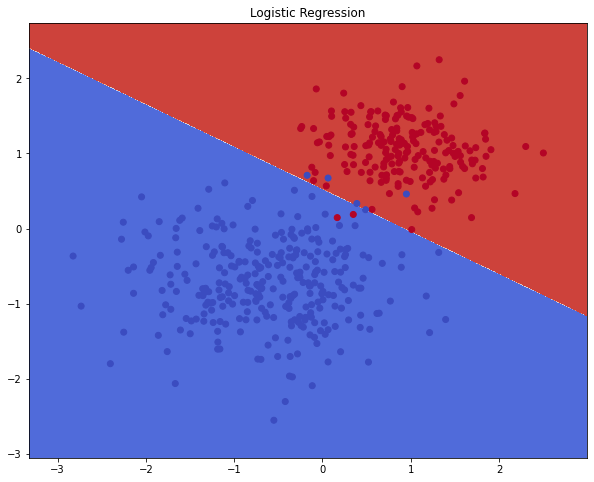

In [105]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In Logistic Regression, Decision Boundary is a linear line, which separates class A and class B. Some of the points from class A have come to the region of class B too, because in linear model, its difficult to get the exact boundary line separating the two classes.